# Cast and Mount Temperature Data at Fogler Passage (CTD)

In [1]:
import pandas as pd
import onc
import os
import json
from typing import List, Tuple
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import helpers_1 as h1
import helpers_ctd as h2

from functools import reduce

# token = os.environ["GRACE_TOKEN"]
from dotenv import load_dotenv
load_dotenv()
token = os.getenv("ONC_TOKEN")

# Create ONC client
my_onc = onc.ONC(token)

## Zoom In - Comparing CTD Cast and Mount Data

### Fetch Data

In [ ]:
# DEFINE START AND END DATES
# JULY 11, 2023
jul_11_start = "2023-07-11T17:00:00.000Z"
jul_11_end = "2023-07-11T22:30:00.000Z"

In [ ]:
# FETCH DATA AND POPULATE A 'DATAFRAME' FOR EACH TIMESERIES

# FOLGER PINNACLE CTD DATAFRAMES

# FOLGER PINNACLE - CONDUCTIVITY
# jul_cast_con_pin = h2.get_property(start=jul_11_start, end=jul_11_end, locationCode="CF341", sensorCategoryCodes="conductivity,depth")
# jul_mount_con_pin = h2.get_property(start=jul_11_start, end=jul_11_end, locationCode="FGPPN", sensorCategoryCodes="conductivity")

# FOLGER PINNACLE - TEMPERATURE
jul_cast_temp_pin = h2.get_property(start=jul_11_start, end=jul_11_end, locationCode="CF341", sensorCategoryCodes="temperature,depth")
jul_mount_temp_pin = h2.get_property(start=jul_11_start, end=jul_11_end, locationCode="FGPPN", sensorCategoryCodes="temperature")

# FOLGER PINNACLE - DENSITY
# jul_cast_den_pin = h2.get_property(start=jul_11_start, end=jul_11_end, locationCode="CF341", sensorCategoryCodes="density,depth")
# jul_mount_den_pin = h2.get_property(start=jul_11_start, end=jul_11_end, locationCode="FGPPN", sensorCategoryCodes="density")


# FOLGER DEEP CTD DATAFRAMES

# FOLGER DEEP - CONDUCTIVITY
# jul_cast_con_deep = h2.get_property(start=jul_11_start, end=jul_11_end, locationCode="CF340", sensorCategoryCodes="conductivity,depth")
# jul_mount_con_deep = h2.get_property(start=jul_11_start, end=jul_11_end, locationCode="FGPD", sensorCategoryCodes="conductivity")

# FOLGER DEEP - TEMPERATURE
jul_cast_temp_deep = h2.get_property(start=jul_11_start, end=jul_11_end, locationCode="CF340", sensorCategoryCodes="temperature,depth")
jul_mount_temp_deep = h2.get_property(start=jul_11_start, end=jul_11_end, locationCode="FGPD", sensorCategoryCodes="temperature")

# FOLGER DEEP - DENSITY
# jul_cast_den_deep = h2.get_property(start=jul_11_start, end=jul_11_end, locationCode="CF340", sensorCategoryCodes="density,depth")
# jul_mount_den_deep = h2.get_property(start=jul_11_start, end=jul_11_end, locationCode="FGPD", sensorCategoryCodes="density")

Requesting CTD data at CF341 from 2023-07-11T17:00:00.000Z to 2023-07-11T22:30:00.000Z
Dataframe start: 2023-07-11 17:12:51.030000+00:00 Dataframe end: 2023-07-11 20:15:39.880000+00:00
Requesting CTD data at FGPPN from 2023-07-11T17:00:00.000Z to 2023-07-11T22:30:00.000Z
Dataframe start: 2023-07-11 17:00:00.701000+00:00 Dataframe end: 2023-07-11 22:29:59.408000+00:00


###  Subplot and Overlay Cast and Mount Data - Temperature

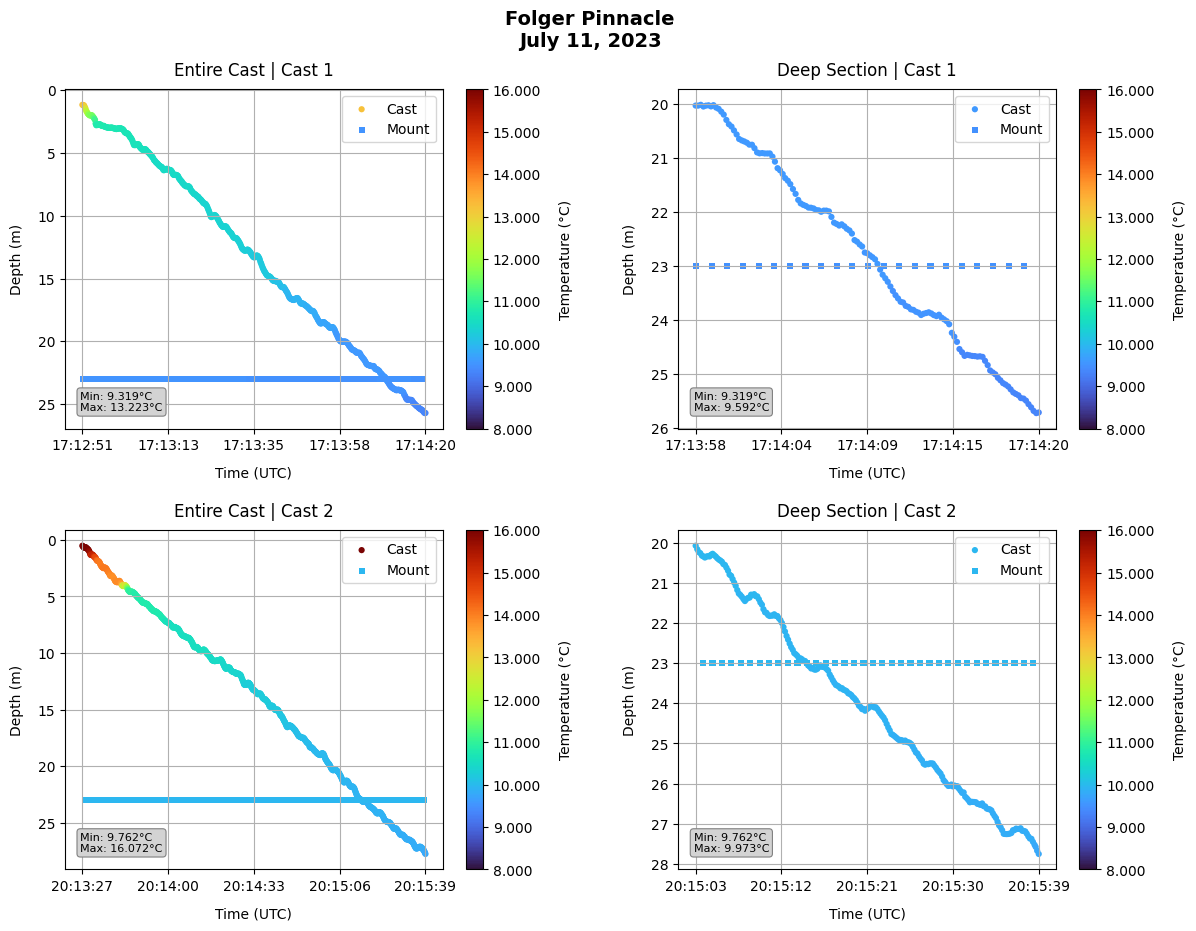

In [5]:
# FOLGER PINNACLE - TEMPERATURE
h2.subplot_cast_and_mount_temp_by_place([jul_mount_temp_pin,jul_cast_temp_pin], "FGPPN")

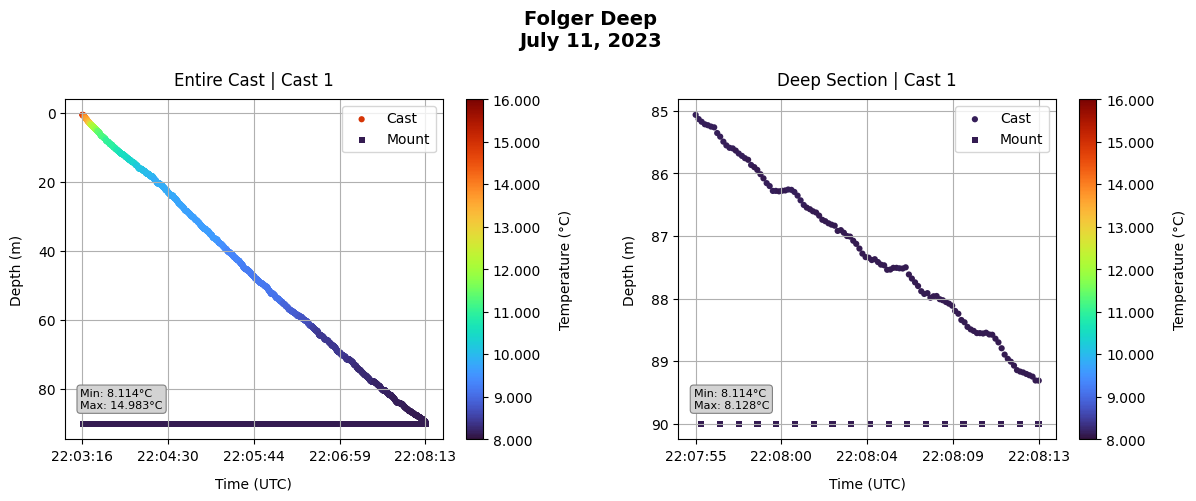

In [6]:
# FOLGER DEEP - TEMPERATURE
h2.subplot_cast_and_mount_temp_by_place([jul_mount_temp_deep,jul_cast_temp_deep], "FGPD")

## The Big Picture - Long Term CTD Mount Data

### Fetch Data 

In [ ]:
# DEFINE START & END DATES
# ENTIRE YEAR 2022
yr_start_22 = "2022-01-01T00:00:00.000Z"
yr_end_22 = "2023-01-01T00:00:00.000Z"

# ENTIRE YEAR 2023
yr_start_23 = "2023-01-01T00:00:00.000Z"
yr_end_23 = "2024-01-01T00:00:00.000Z"

Requesting CTD data at FGPD from 2022-01-01T00:00:00.000Z to 2023-01-01T00:00:00.000Z
Dataframe start: 2022-01-01 00:15:00+00:00 Dataframe end: 2022-12-31 23:45:00+00:00
Requesting CTD data at FGPPN from 2022-01-01T00:00:00.000Z to 2023-01-01T00:00:00.000Z
Dataframe start: 2022-01-01 00:15:00+00:00 Dataframe end: 2022-12-31 23:45:00+00:00


In [ ]:
# FETCH DATA AND POPULATE A 'DATAFRAME' FOR EACH TIMESERIES
# ENTIRE YEAR 2022
yr_22_mount_all_deep = h2.get_property(start=yr_start_22, end=yr_end_22, locationCode="FGPD", sensorCategoryCodes="temperature,density,conductivity", resample=1800)
yr_22_mount_all_pin = h2.get_property(start=yr_start_22, end=yr_end_22, locationCode="FGPPN", sensorCategoryCodes="temperature,density,conductivity", resample=1800)

# ENTIRE YEAR 2023
# yr_23_mount_all_deep = h2.get_property(start=yr_start_23, end=yr_end_23, locationCode="FGPD", sensorCategoryCodes="temperature,density,conductivity", resample=1800)
# yr_23_mount_all_pin = h2.get_property(start=yr_start_23, end=yr_end_23, locationCode="FGPPN", sensorCategoryCodes="temperature,density,conductivity", resample=1800)

### Subplot Conductivity, Temperature, Density

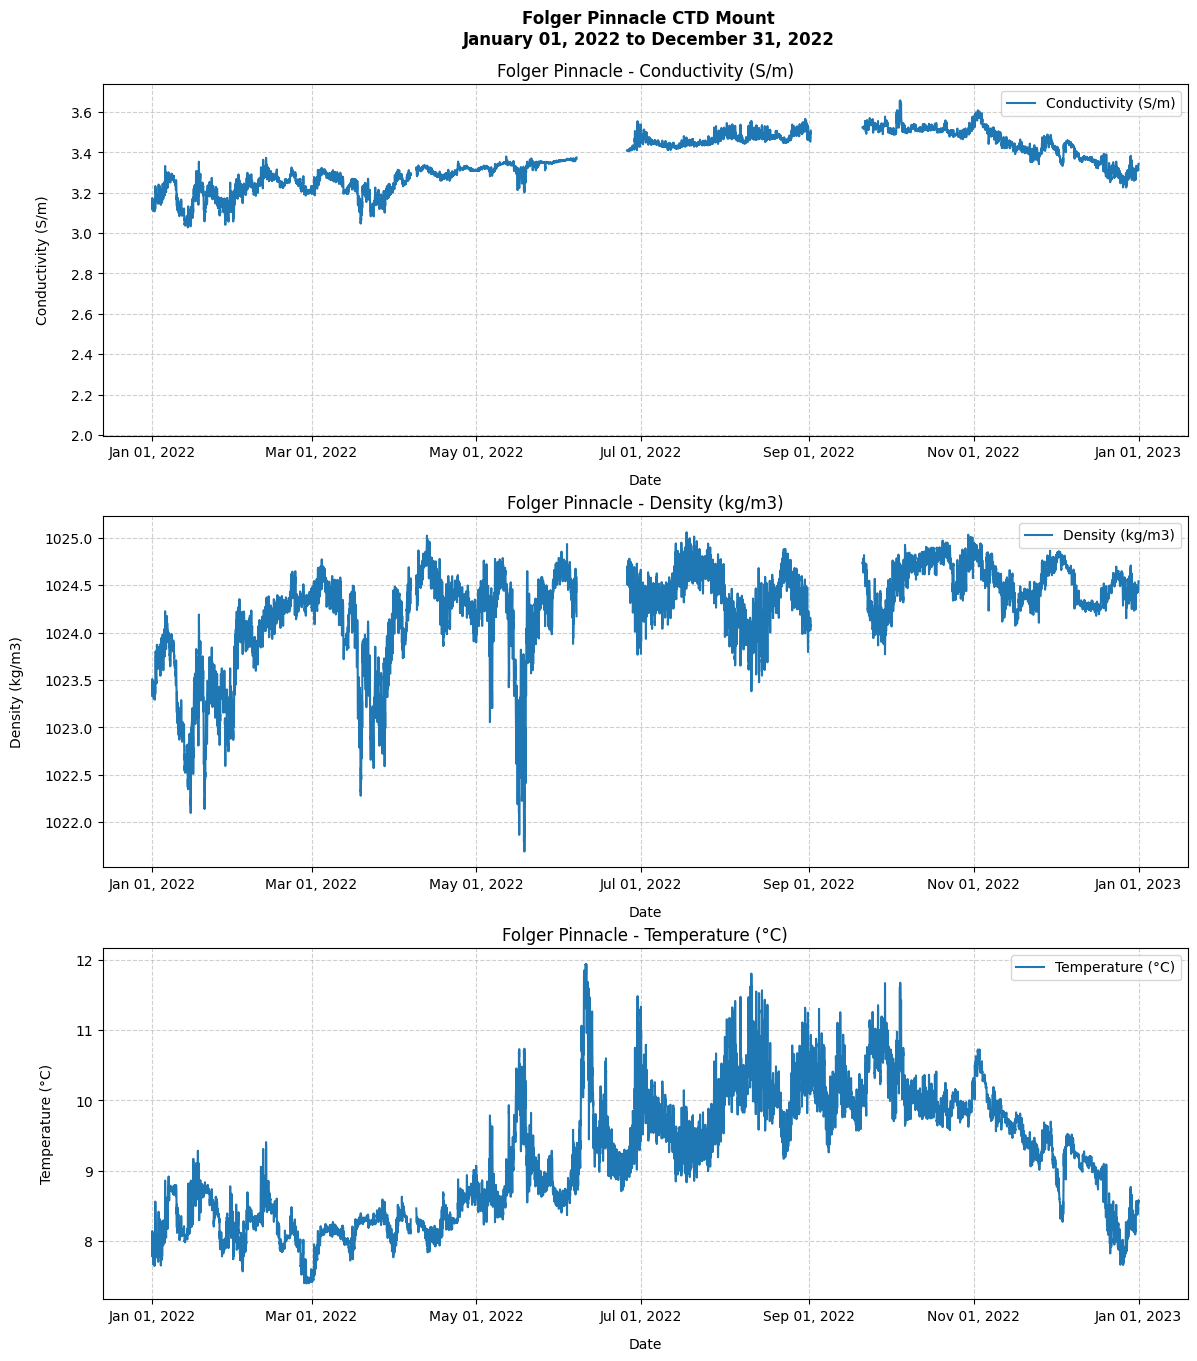

In [ ]:
# FOLGER PINNACLE - CTD 2022
h2.subplot_longterm_mount(df=yr_22_mount_all_pin, locationCode="FGPPN")

In [ ]:
# FOLGER DEEP - CTD 2022
h2.subplot_longterm_mount(df=yr_22_mount_all_deep, locationCode="FGPD")

NameError: name 'yr_23_mount_all_deep' is not defined

## Plot cast and mount temp data induvidual - during cast periods

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1cd2cd01-70e8-41b6-af2d-f797c6675dbe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>